In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, classification_report

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

C:\Users\narah\anaconda3\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('../datasets/obesity.csv')

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [5]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [6]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
df.duplicated().sum()

24

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in df.columns if df[cname].dtype == "object"]


In [11]:
unique_counts = df[categorical_cols].nunique()
unique_values = df[categorical_cols].apply(lambda x: x.unique())

In [12]:
pd.DataFrame({'Number of Unique Values': unique_counts, 'Unique Values': unique_values})

,Number of Unique Values,Unique Values
Gender,2,"[Female, Male]"
family_history_with_overweight,2,"[yes, no]"
FAVC,2,"[no, yes]"
CAEC,4,"[Sometimes, Frequently, Always, no]"
SMOKE,2,"[no, yes]"
SCC,2,"[no, yes]"
CALC,4,"[no, Sometimes, Frequently, Always]"
MTRANS,5,"[Public_Transportation, Walking, Automobile, M..."
NObeyesdad,7,"[Normal_Weight, Overweight_Level_I, Overweight..."


In [13]:
NObeyesdadVC = df.NObeyesdad.value_counts()
NObeyesdadVC

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: NObeyesdad, dtype: int64

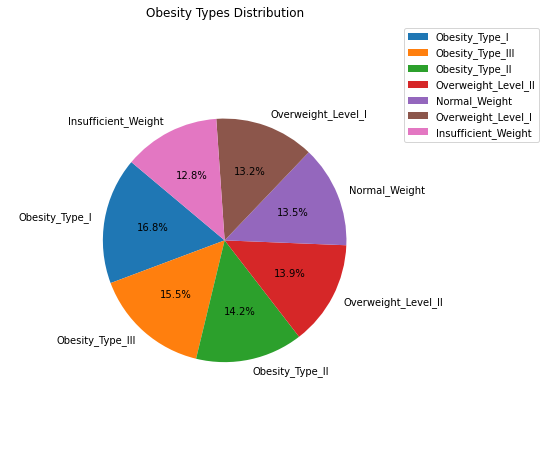

In [14]:
labels = NObeyesdadVC.index.tolist()
sizes = NObeyesdadVC.values.tolist()


plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, radius=0.7)


plt.legend(loc='upper left', bbox_to_anchor=(0.9, 1))


plt.title('Obesity Types Distribution')


plt.show()

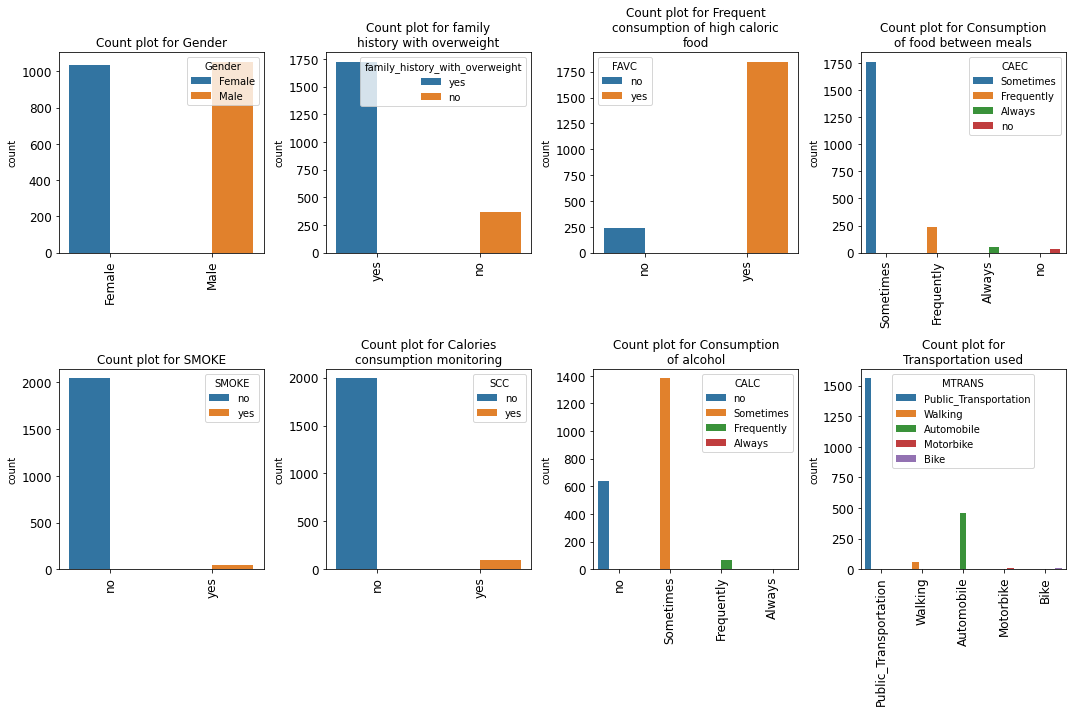

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))


axes = axes.flatten()


num_columns_desc = ['Gender', 'family history with overweight', 'Frequent consumption of high caloric food', 'Consumption of food between meals', 'SMOKE', 'Calories consumption monitoring',
                'Consumption of alcohol', 'Transportation used']


for i, column in enumerate(df[categorical_cols].drop(columns=['NObeyesdad']).columns):
    sns.countplot(x=column, data=df, ax=axes[i], hue=column)
    wrapped_title = '\n'.join(textwrap.wrap(f'Count plot for {num_columns_desc[i]}', width=27))
    axes[i].set_title(wrapped_title)
    axes[i].title.set_size(12)
    axes[i].tick_params(axis='x', labelrotation=90)  # Set y-axis labels rotation angle
    axes[i].tick_params(axis='both', which='major', labelsize=12)  # Set tick label font size
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

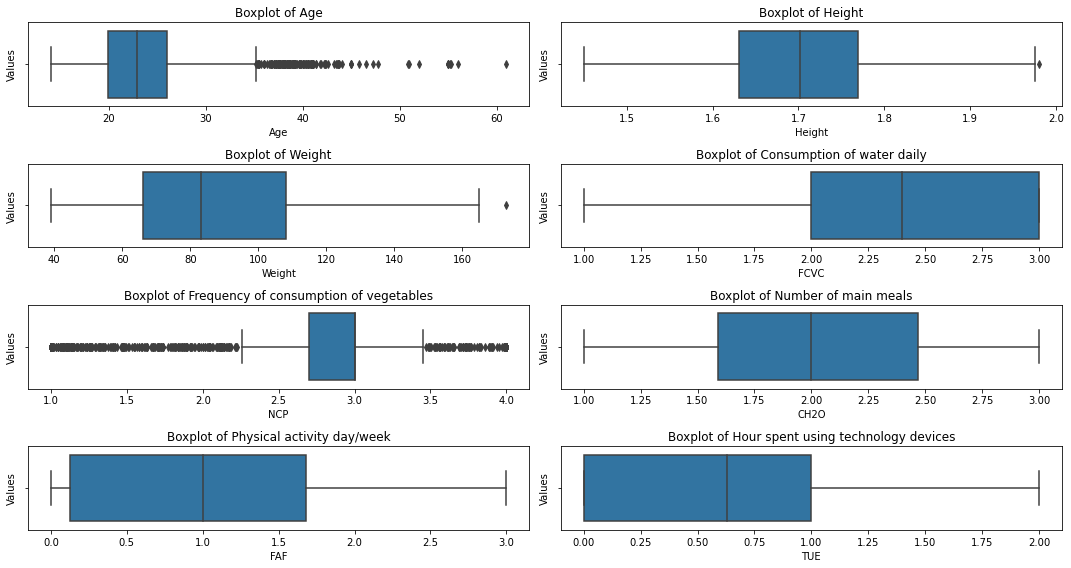

In [16]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 2*4))


axes = axes.flatten()


columns_desc = ['Age', 'Height', 'Weight', 'Consumption of water daily', 'Frequency of consumption of vegetables', 'Number of main meals',
                'Physical activity day/week', 'Hour spent using technology devices']


labels = ['years', 'meter', 'kilograms', 'litre', 'Frequency', 'Number','day/week', 'Hours/day']
for i, column in enumerate(df[numerical_cols].columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {columns_desc[i]}')
    axes[i].set_ylabel('Values')


plt.tight_layout()
plt.show()

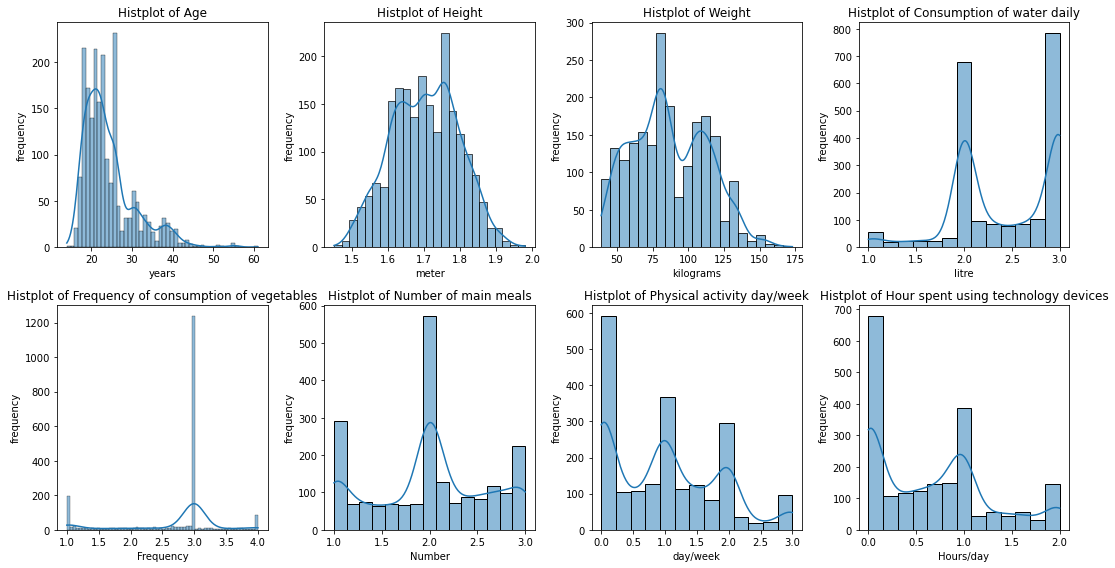

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 4*2))


axes = axes.flatten()


labels = ['years', 'meter', 'kilograms', 'litre', 'Frequency', 'Number',
                'day/week', 'Hours/day']

for i, column in enumerate(df[numerical_cols].columns):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i])
    axes[i].set_title(f'Histplot of {columns_desc[i]}')
    axes[i].title.set_size(12)
    axes[i].set_xlabel(labels[i])
    axes[i].set_ylabel('frequency')


plt.tight_layout()
plt.show()

In [18]:
df["family_history_with_overweight"] = df["family_history_with_overweight"].map({"yes": 1, "no": 0})
df["FAVC"] = df["FAVC"].map({"yes": 1, "no": 0})
df["SMOKE"] = df["SMOKE"].map({"yes": 1, "no": 0})
df["SCC"] = df["SCC"].map({"yes": 1, "no": 0})

In [19]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [20]:
X = df.drop(columns='NObeyesdad')
y = df['NObeyesdad']

In [21]:
for label in X:
    X[label] = LabelEncoder().fit_transform(X[label])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (1669, 16)
X_test shape (418, 16)
y_train shape (1669,)
y_test shape (418,)


In [24]:
X_train['CALC'].unique()

array([3, 2, 1, 0])

In [25]:
X_train.shape

(1669, 16)

In [26]:
X_test.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
1337,0,147,621,713,1,1,74,477,2,0,222,0,119,840,2,3
1763,1,1159,1474,1367,1,1,471,477,2,1,355,0,578,188,2,3
389,0,2,243,256,1,1,0,0,2,0,549,0,0,0,3,3
595,1,39,1384,184,1,1,502,634,2,0,549,0,1071,264,3,0
1735,1,1009,1366,1278,1,1,344,477,2,0,1087,0,419,0,2,3


In [27]:
original_labels = y_test.value_counts()
original_labels

Obesity_Type_I         70
Obesity_Type_II        64
Normal_Weight          61
Obesity_Type_III       60
Insufficient_Weight    59
Overweight_Level_I     55
Overweight_Level_II    49
Name: NObeyesdad, dtype: int64

In [28]:
le = LabelEncoder()


y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [29]:
def make_evaluation(y_true, y_pred, title):
    
    target_names = ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']
    print(classification_report(y_true, y_pred, target_names=target_names))

    fig, ax = plt.subplots(figsize=(10, 5))
    disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, ax=ax)
    ax.xaxis.set_ticklabels(target_names, rotation=90)  
    ax.yaxis.set_ticklabels(target_names)
    ax.grid(False)  
    _ = ax.set_title(title)
    plt.show()

In [30]:
X_train_svm, X_test_svm = X_train.copy(), X_test.copy()

                     precision    recall  f1-score   support

Insufficient_Weight       0.40      0.03      0.06        59
      Normal_Weight       0.61      0.41      0.49        61
     Obesity_Type_I       0.18      0.89      0.30        70
    Obesity_Type_II       0.00      0.00      0.00        64
   Obesity_Type_III       1.00      0.07      0.12        60
 Overweight_Level_I       0.00      0.00      0.00        55
Overweight_Level_II       0.18      0.06      0.09        49

           accuracy                           0.23       418
          macro avg       0.34      0.21      0.15       418
       weighted avg       0.34      0.23      0.16       418



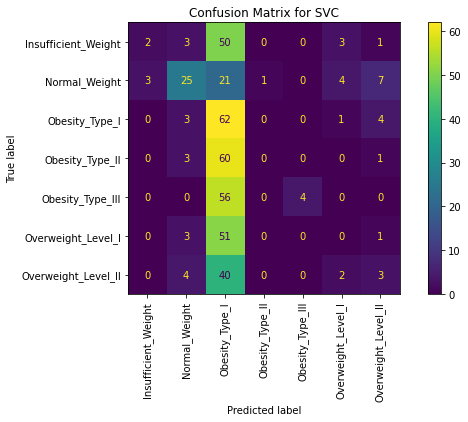

In [31]:
sc = StandardScaler()

X_train_svm[['Age', 'Height', 'Weight']] = sc.fit_transform(X_train_svm[['Age', 'Height', 'Weight']])

X_test_svm[['Age', 'Height', 'Weight']] = sc.transform(X_test_svm[['Age', 'Height', 'Weight']])


svm_clf = SVC(gamma='auto')
svm_clf.fit(X_train_svm, y_train)


svm_y_pred = svm_clf.predict(X_test_svm)
make_evaluation(y_test, svm_y_pred, title=f"Confusion Matrix for {svm_clf.__class__.__name__}")

In [32]:
X_train.shape

(1669, 16)

                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.93      0.96        59
      Normal_Weight       0.84      0.93      0.88        61
     Obesity_Type_I       1.00      0.96      0.98        70
    Obesity_Type_II       1.00      1.00      1.00        64
   Obesity_Type_III       1.00      1.00      1.00        60
 Overweight_Level_I       0.94      0.89      0.92        55
Overweight_Level_II       0.92      0.96      0.94        49

           accuracy                           0.95       418
          macro avg       0.95      0.95      0.95       418
       weighted avg       0.96      0.95      0.96       418



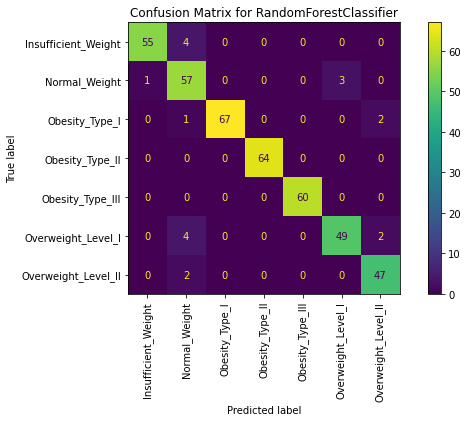

In [33]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)


rf_y_pred = rf_clf.predict(X_test)


make_evaluation(y_test, rf_y_pred, title=f"Confusion Matrix for {rf_clf.__class__.__name__}")

In [34]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num = 10)]
max_features = ['sqrt', 'log2', None]
max_depth = [int(x) for x in np.linspace(start=10, stop=1000, num = 10)]
min_samples_split = [2,5,10,14]
min_samples_leaf = [1,2,4,6,8]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'criterion': ['gini', 'entropy', 'log_loss']
}


random_grid

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000],
 'max_features': ['sqrt', 'log2', None],
 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'min_samples_split': [2, 5, 10, 14],
 'min_samples_leaf': [1, 2, 4, 6, 8],
 'criterion': ['gini', 'entropy', 'log_loss']}

In [35]:
rf = RandomForestClassifier()


rf_randomSearchCV = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, verbose=2, random_state=42, n_jobs=None)


rf_randomCV= rf_randomSearchCV.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END criterion=log_loss, max_depth=670, max_features=sqrt, min_samples_leaf=8, min_samples_split=14, n_estimators=1155; total time=   5.6s
[CV] END criterion=log_loss, max_depth=670, max_features=sqrt, min_samples_leaf=8, min_samples_split=14, n_estimators=1155; total time=   4.2s
[CV] END criterion=log_loss, max_depth=670, max_features=sqrt, min_samples_leaf=8, min_samples_split=14, n_estimators=1155; total time=   4.4s
[CV] END criterion=log_loss, max_depth=670, max_features=sqrt, min_samples_leaf=8, min_samples_split=14, n_estimators=1155; total time=   4.8s
[CV] END criterion=log_loss, max_depth=670, max_features=sqrt, min_samples_leaf=8, min_samples_split=14, n_estimators=1155; total time=   4.7s
[CV] END criterion=gini, max_depth=120, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=120, max_features=log2, min_samples_leaf=2, min_s

[CV] END criterion=entropy, max_depth=340, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=522; total time=   4.9s
[CV] END criterion=entropy, max_depth=340, max_features=None, min_samples_leaf=6, min_samples_split=2, n_estimators=522; total time=   5.3s
[CV] END criterion=gini, max_depth=230, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1155; total time=   7.4s
[CV] END criterion=gini, max_depth=230, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1155; total time=   7.9s
[CV] END criterion=gini, max_depth=230, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1155; total time=   7.6s
[CV] END criterion=gini, max_depth=230, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1155; total time=   8.1s
[CV] END criterion=gini, max_depth=230, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1155; total time=   7.6s
[CV] END criterion=gini, max_d

[CV] END criterion=gini, max_depth=560, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1155; total time=   5.0s
[CV] END criterion=gini, max_depth=560, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1155; total time=   4.7s
[CV] END criterion=gini, max_depth=560, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1155; total time=   4.4s
[CV] END criterion=gini, max_depth=340, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time=   7.6s
[CV] END criterion=gini, max_depth=340, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time=   6.9s
[CV] END criterion=gini, max_depth=340, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time=   7.7s
[CV] END criterion=gini, max_depth=340, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2000; total time=   7.2s
[CV] END criterion=gini, max_depth

[CV] END criterion=entropy, max_depth=780, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=733; total time=   2.6s
[CV] END criterion=entropy, max_depth=780, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=733; total time=   2.3s
[CV] END criterion=entropy, max_depth=780, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=733; total time=   2.4s
[CV] END criterion=entropy, max_depth=780, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=733; total time=   6.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=733; total time=   7.5s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=733; total time=   6.8s
[CV] END criterion=entropy, max_depth=450, max_features=sqrt, min_samples_leaf=1, min_samples_split=14, n_estimators=733; total time=   7.2s
[CV] END criterio

[CV] END criterion=gini, max_depth=670, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=733; total time=   4.7s
[CV] END criterion=gini, max_depth=670, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=733; total time=   4.7s
[CV] END criterion=gini, max_depth=670, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=733; total time=   4.8s
[CV] END criterion=gini, max_depth=670, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=733; total time=   4.9s
[CV] END criterion=gini, max_depth=670, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=733; total time=   4.9s
[CV] END criterion=gini, max_depth=120, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=311; total time=   3.6s
[CV] END criterion=gini, max_depth=120, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=311; total time=   4.2s
[CV] END criterion=gini, max_depth

[CV] END criterion=gini, max_depth=780, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1577; total time=  11.0s
[CV] END criterion=gini, max_depth=120, max_features=log2, min_samples_leaf=8, min_samples_split=14, n_estimators=1155; total time=   8.1s
[CV] END criterion=gini, max_depth=120, max_features=log2, min_samples_leaf=8, min_samples_split=14, n_estimators=1155; total time=   7.8s
[CV] END criterion=gini, max_depth=120, max_features=log2, min_samples_leaf=8, min_samples_split=14, n_estimators=1155; total time=   7.9s
[CV] END criterion=gini, max_depth=120, max_features=log2, min_samples_leaf=8, min_samples_split=14, n_estimators=1155; total time=   7.6s
[CV] END criterion=gini, max_depth=120, max_features=log2, min_samples_leaf=8, min_samples_split=14, n_estimators=1155; total time=   8.0s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=944; total time=   9.0s
[CV] END criterion=entropy

[CV] END criterion=gini, max_depth=890, max_features=None, min_samples_leaf=2, min_samples_split=14, n_estimators=1366; total time=  18.5s
[CV] END criterion=gini, max_depth=890, max_features=None, min_samples_leaf=2, min_samples_split=14, n_estimators=1366; total time=  18.5s
[CV] END criterion=log_loss, max_depth=780, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1788; total time=  20.3s
[CV] END criterion=log_loss, max_depth=780, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1788; total time=  19.6s
[CV] END criterion=log_loss, max_depth=780, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1788; total time=  20.7s
[CV] END criterion=log_loss, max_depth=780, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1788; total time=  20.3s
[CV] END criterion=log_loss, max_depth=780, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1788; total time=  20.2s
[CV] END cri

[CV] END criterion=log_loss, max_depth=120, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1366; total time=  14.8s
[CV] END criterion=log_loss, max_depth=120, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1366; total time=  14.7s
[CV] END criterion=log_loss, max_depth=120, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1366; total time=  14.5s
[CV] END criterion=gini, max_depth=1000, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=522; total time=   6.8s
[CV] END criterion=gini, max_depth=1000, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=522; total time=   7.2s
[CV] END criterion=gini, max_depth=1000, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=522; total time=   7.0s
[CV] END criterion=gini, max_depth=1000, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=522; total time=   7.2s
[CV] END criterion=

[CV] END criterion=gini, max_depth=890, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1366; total time=  10.6s
[CV] END criterion=gini, max_depth=890, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1366; total time=  10.8s
[CV] END criterion=gini, max_depth=890, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1366; total time=  11.0s
[CV] END criterion=gini, max_depth=890, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=1366; total time=  10.8s
[CV] END criterion=log_loss, max_depth=450, max_features=None, min_samples_leaf=6, min_samples_split=10, n_estimators=1788; total time=  34.7s
[CV] END criterion=log_loss, max_depth=450, max_features=None, min_samples_leaf=6, min_samples_split=10, n_estimators=1788; total time=  36.0s
[CV] END criterion=log_loss, max_depth=450, max_features=None, min_samples_leaf=6, min_samples_split=10, n_estimators=1788; total time=  36.9s
[CV] END criterion=

                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.97      0.96        59
      Normal_Weight       0.95      0.90      0.92        61
     Obesity_Type_I       1.00      1.00      1.00        70
    Obesity_Type_II       1.00      1.00      1.00        64
   Obesity_Type_III       1.00      1.00      1.00        60
 Overweight_Level_I       0.93      0.98      0.96        55
Overweight_Level_II       1.00      0.98      0.99        49

           accuracy                           0.98       418
          macro avg       0.98      0.98      0.98       418
       weighted avg       0.98      0.98      0.98       418



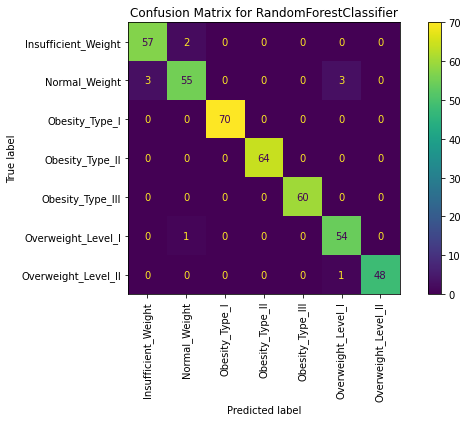

In [36]:
rf_clf = RandomForestClassifier(n_estimators=1366, min_samples_split=10, min_samples_leaf=1, max_features= None, max_depth=340, criterion='entropy', random_state=42)
rf_clf.fit(X_train, y_train)


rf_y_pred = rf_clf.predict(X_test)


make_evaluation(y_test, rf_y_pred, title=f"Confusion Matrix for {rf_clf.__class__.__name__}")

In [37]:
print('Accuracy of RandomForest', accuracy_score(y_test, rf_y_pred))
print('F1_score of RandomForest', f1_score(y_test, rf_y_pred, average='weighted'))
print('Precision_score of RandomForest', precision_score(y_test, rf_y_pred, average='weighted'))
print('Recall_score of RandomForest', recall_score(y_test, rf_y_pred, average='weighted'))

Accuracy of RandomForest 0.9760765550239234
F1_score of RandomForest 0.9760018661900737
Precision_score of RandomForest 0.9763199142055767
Recall_score of RandomForest 0.9760765550239234


In [39]:
X_train.shape

(1669, 16)

In [38]:
import pickle
pickle.dump(rf_clf, open("../models/obesity.pkl",'wb'))